In [43]:
import os
import pandas as pd

file_path = os.path.join('..', 'data', 'Algerian_forest_fires_dataset_UPDATE.csv')

# Read the CSV file using the constructed path
data = pd.read_csv(file_path, delimiter=',', dtype=str)

data.columns = data.columns.str.strip()

columns_to_convert = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data = data.dropna(subset=columns_to_convert)

data['Classes'] = data['Classes'].astype('category')

data['day'] = pd.to_numeric(data['day'], errors='coerce')
data['month'] = pd.to_numeric(data['month'], errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')

data = data.dropna(subset=['day', 'month', 'year'])

data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data = data.drop(columns=['day', 'month', 'year'])

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    category      
 11  date         243 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(7), int64(3)
memory usage: 23.4 KB
None
   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.

In [44]:
unique_classes = data['Classes'].unique()
print('Unique class labels before cleaning:', unique_classes)

data['Classes'] = data['Classes'].str.strip().str.lower()

unique_classes = data['Classes'].unique()
print('Unique class labels after cleaning:', unique_classes)

Unique class labels before cleaning: ['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ', 'not fire     ', 'not fire    ']
Categories (8, object): ['fire', 'fire ', 'fire   ', 'not fire', 'not fire ', 'not fire   ', 'not fire    ', 'not fire     ']
Unique class labels after cleaning: ['not fire' 'fire']


### Steps

1. Loaded data Algerian_forest_fires_dataset_UPDATE.csv from data folder
2. Cleaned up the columns by removing trailing spaces from the column names
3. Edited column data types to match data accordingly
4. In case of ValueErrors the data is marked as NaN and later rows including none values are removed
5. Combined day, month and year columns into a separate date column
6. Printed basic information on the edited dataset
7. Cleaned up the fire and no fire classes to get rid of typos causing multiple classes of each

### Findings 

- No NaN values left in the dataset
- Values now in accurate format and looking clean

### Notes

- Set data format initially into str after noticing the original data formats needed fixing, to ensure the data is in predictable format before cleaning
- Most likely the data was in str format initially, but this ensures I know what I am working with

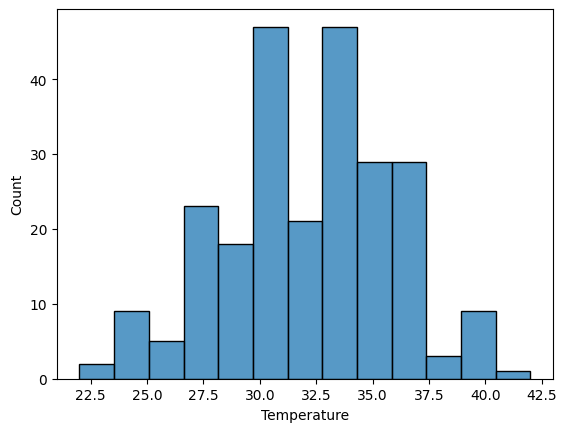

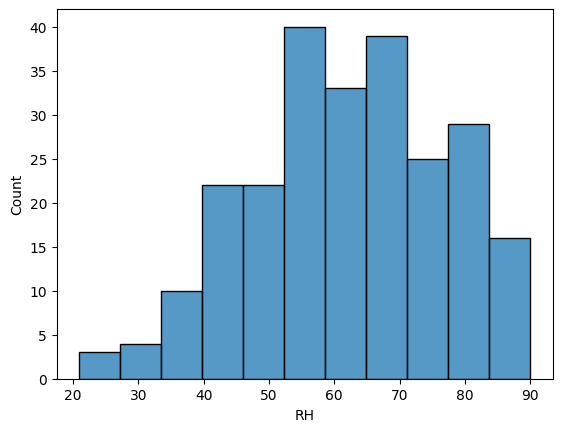

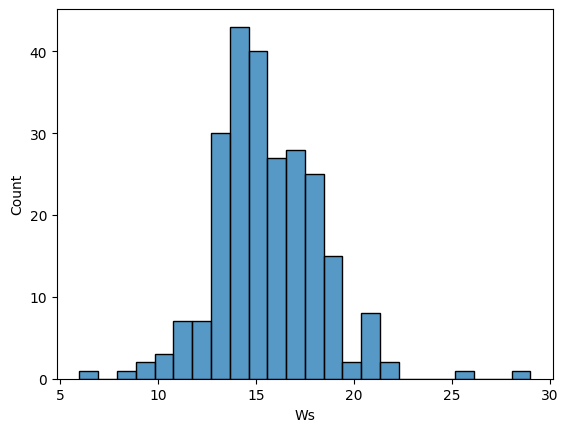

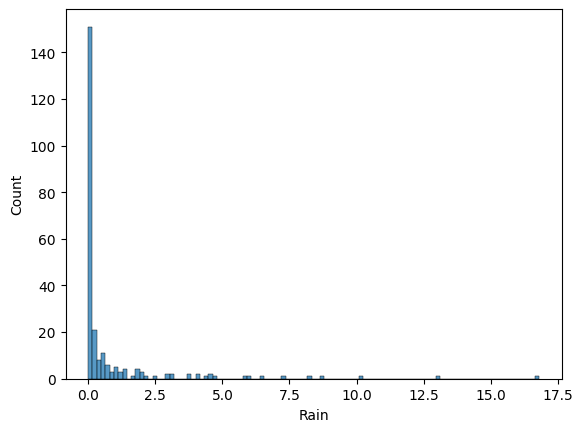

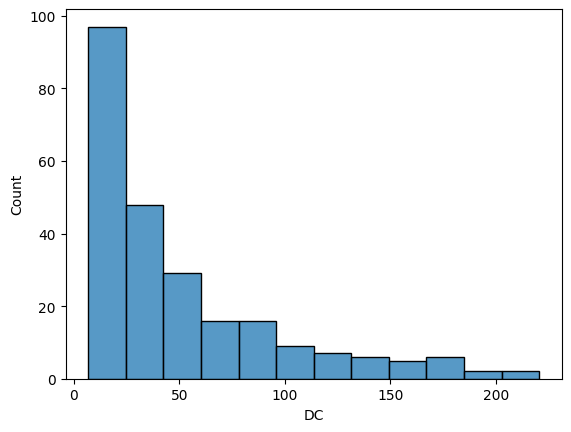

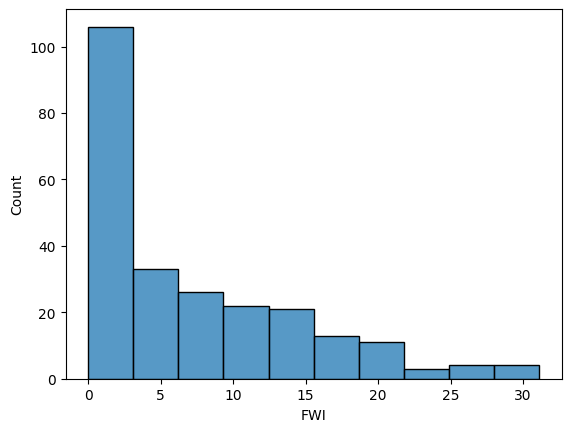

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Temperature'])
plt.show()

sns.histplot(data['RH'])
plt.show()

sns.histplot(data['Ws'])
plt.show()

sns.histplot(data['Rain'])
plt.show()

sns.histplot(data['DC'])
plt.show()

sns.histplot(data['FWI'])
plt.show()

### Steps

1. Chose a few columns of interest to see how the data is distributed
2. Draw basic histograms to see the counts of each value for the columns

### Findings

- Rain seems to be very limited in this area
- Wind speed seems normally distributed, similar to temperature and relative humidity
- Indexes used seems to mostly contain lower small values

### Notes

- Did not include all columns since I am going to be performing more precise analysis later on
- Mostly focused on spotting any outliers in columns of interest

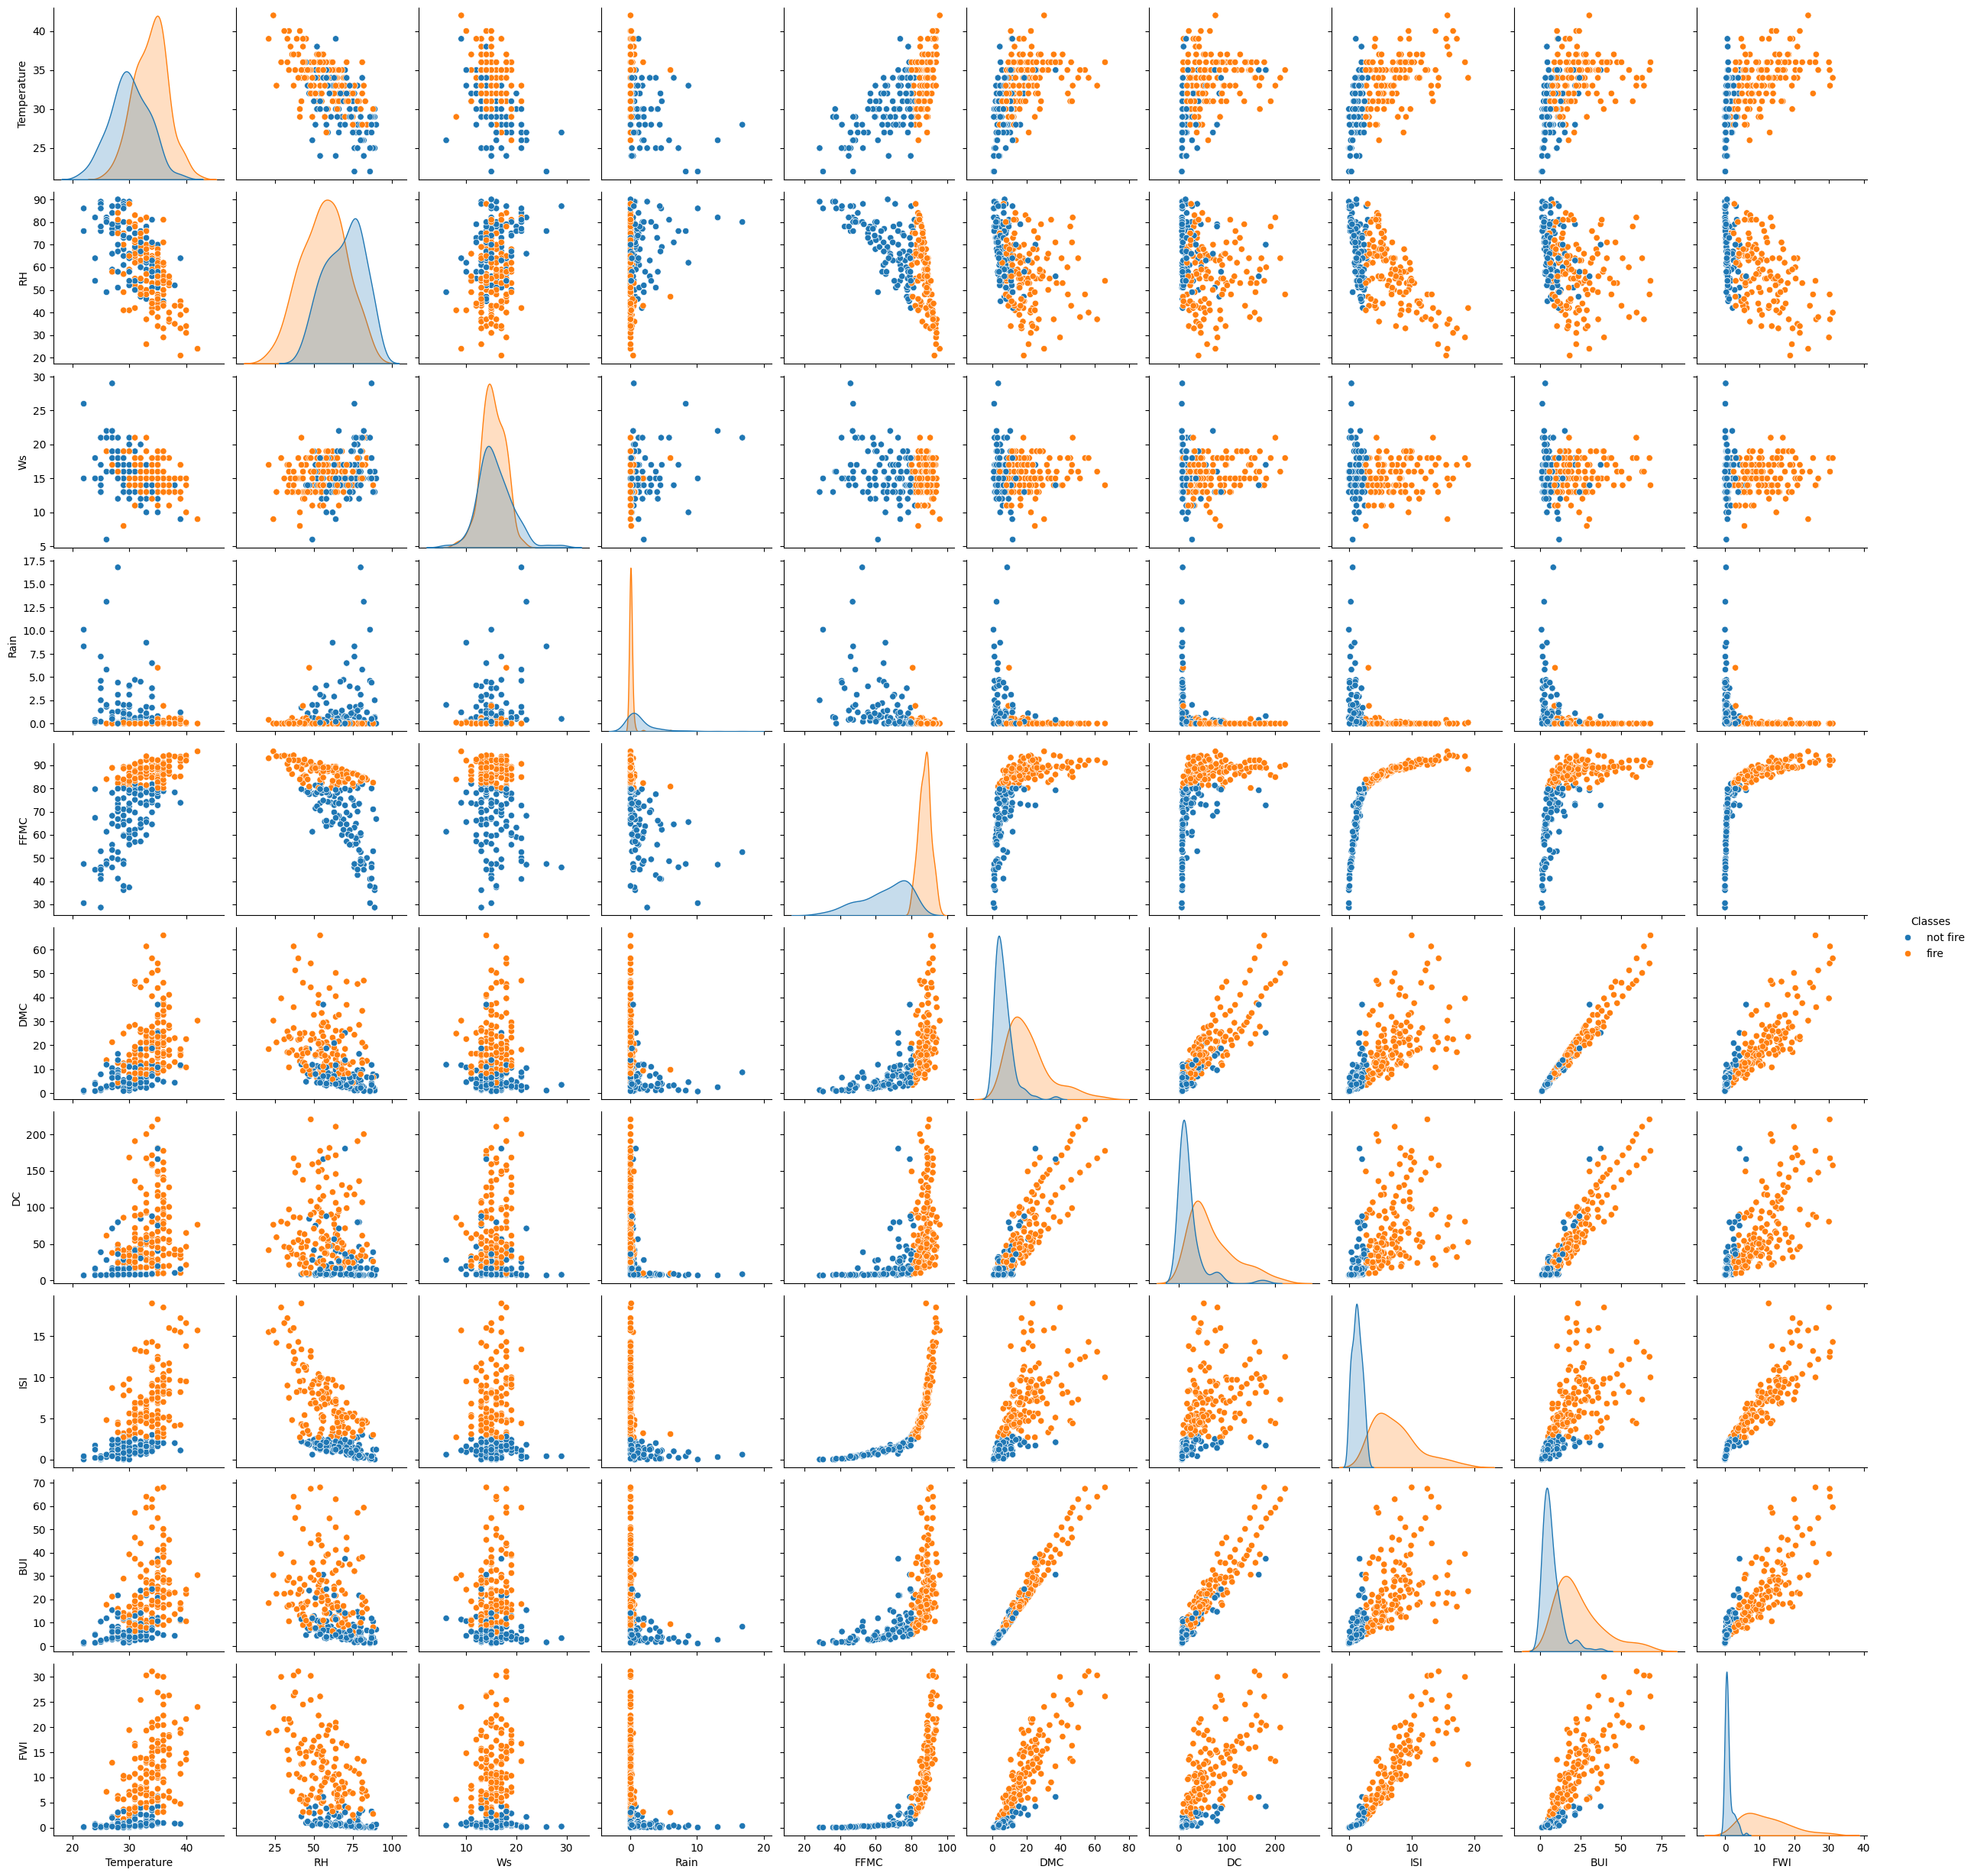

In [46]:
columns_for_plotting = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

sns.pairplot(data[columns_for_plotting], hue='Classes')

plt.show()


### Steps

1. Created exploratory correlation matrix style pairplot of the columns, which can be analysed further later on

### Findings

- Multiple columns can clearly be used to separate no fire and fire classes from each other
- Indexes seem to give more precise correlations
- Multiple correlations worthy of exploring further



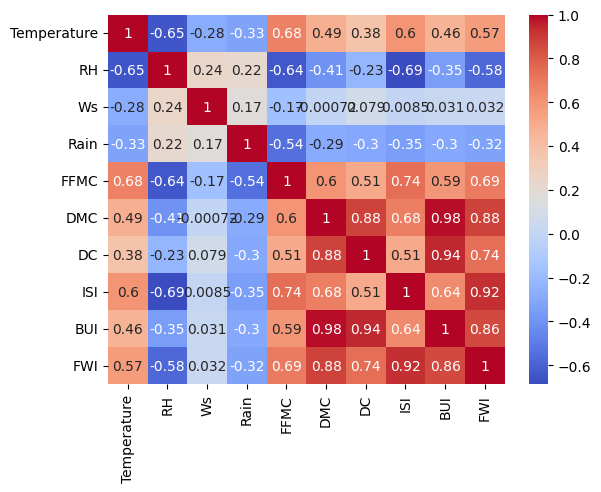

In [47]:
correlation_matrix = data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### Steps

1. Created exploratory correlation matrix as a heat map to explore the numerical values of correlations between values

### Findings

- Highest correlations between different indexes
- Between natural variables, temperature and relative humidity seems to have the createst (negative) correlation

### Notes

- Variables with high positive correlations might convey similar information and could be considered redundant in certain analyses

In [48]:
from scipy.stats import ttest_ind

fire_data = data[data['Classes'] == 'fire']
not_fire_data = data[data['Classes'] == 'not fire']

for column in columns_to_convert:
    t_stat, p_val = ttest_ind(fire_data[column], not_fire_data[column], nan_policy='omit')
    print(f'{column}: t-statistic = {t_stat}, p-value = {p_val}')

Temperature: t-statistic = 9.351982941248785, p-value = 6.16601521601067e-18
RH: t-statistic = -7.439525613647102, p-value = 1.7723198492888224e-12
Ws: t-statistic = -1.088795706785268, p-value = 0.27733156015345045
Rain: t-statistic = -6.359892925353739, p-value = 1.00506115805083e-09
FFMC: t-statistic = 18.704484277524116, p-value = 7.805766109910667e-49
DMC: t-statistic = 11.216777369700345, p-value = 9.04693791286777e-24
DC: t-statistic = 9.23176240207535, p-value = 1.4164313798428558e-17
ISI: t-statistic = 16.83747259806608, p-value = 1.4003747135112407e-42
BUI: t-statistic = 11.245433267730034, p-value = 7.312071783757669e-24
FWI: t-statistic = 16.070028505772136, p-value = 5.471842985344983e-40


### Steps

1. Separated data into fire and no fire data
2. Ran t-test analysis on the variables against fire and no fire data to see how much they differ between groups, and whether they are statistically significant (on 0.05 level)

### Findings

- **Significant Features:** Temperature, RH, Rain, FFMC, DMC, DC, ISI, BUI, and FWI show significant differences between fire and no fire groups.
- **Non-Significant Feature:** Wind Speed (Ws) does not show a significant difference between the groups.

### Notes

- Out of the significant features, FFMC had the greatest difference between fire and no fire groups. Therefore, it will be used as an example in following analyses.


In [49]:
import plotly.express as px
import plotly.figure_factory as ff

pd.set_option('future.no_silent_downcasting', True)

fig = px.scatter(data, x='Temperature', y='FFMC', color='Classes', title='Temperature vs. FFMC')
fig.show()

data['Classes'] = data['Classes'].replace({'fire': 1, 'not fire': 0})

correlation_matrix = data.corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis'
)
fig.update_layout(title='Correlation Matrix Heatmap', xaxis_title='Variables', yaxis_title='Variables')
fig.show()

### Steps

1. Created couple of interactive plots to showcase the data used
2. First plot shows scatter plot with temperature and FFMC index, with fire and no fire data points in different colors
3. Second plot shows similar correlation matrix as shown before, now with different color scheme, all the variables from data included and interactability to check values within each cell by hovering on top of it

### Findings

- Supports earlier correlation matrix findings
- Strongest correlation between fire and no fire classes and different indexes, but also with rain, RH and temperature



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = data.drop(['Classes', 'date'], axis=1)
target = data['Classes']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

y_train = y_train.astype('int')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Steps

1. Wanted to run some quick tests with machine learning models and train them using the data
2. Selected the fire and no fire classes as target variables and the rest as feature variables
3. Split the data into testing and training data, with the test size being 20% of the data and rest used in training
4. Scaled the data to have 0 mean and 1 standard variation to ensure better performance of the model and have all features contribute equally to the result and are on the same scale


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

y_test = y_test.astype('int')

print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg, zero_division='warn'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))

print("Decision Tree")
print(classification_report(y_test, y_pred_decision_tree, zero_division='warn'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_decision_tree))

print("Random Forest")
print(classification_report(y_test, y_pred_random_forest, zero_division='warn'))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_random_forest))


Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.96      0.96      0.96        27

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

ROC AUC Score: 0.9587542087542087
Decision Tree
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.55      1.00      0.71        27

    accuracy                           0.55        49
   macro avg       0.28      0.50      0.36        49
weighted avg       0.30      0.55      0.39        49

ROC AUC Score: 0.5
Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.55      1.00      0.71        27

    accuracy                           0.55        49
   macro avg       0.28    

c:\Users\paakk\Documents\Personal\Projects\data_analysis_portfolio\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

c:\Users\paakk\Documents\Personal\Projects\data_analysis_portfolio\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\paakk\Documents\Personal\Projects\data_analysis_portfolio\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\paakk\Documents\Personal\Projects\data_analysis_portfolio\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

### Steps

1. Initialized three different models
2. Trained the models with the data determined earlier
3. Ran predictions based on the trained models
4. Created reports based on predicted data and actual values of test data

### Findings

- Overall, all models performed with high accuracy, with only couple of mistakes done by the logistic regression model

### Notes

- The size of data used is not very large and was not selected with machine learning in mind so results should be taken with a grain of salt
- Overall, a fun experiment with rather simple execution

In [52]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print(f'Confusion Matrix Logistic Regression:\n{cm_log_reg}')
print(f'Confusion Matrix Decision Tree:\n{cm_decision_tree}')
print(f'Confusion Matrix Random Forest:\n{cm_random_forest}')

Confusion Matrix Logistic Regression:
[[21  1]
 [ 1 26]]
Confusion Matrix Decision Tree:
[[ 0 22]
 [ 0 27]]
Confusion Matrix Random Forest:
[[ 0 22]
 [ 0 27]]


### Steps

1. Created confusion matrixes for the three models to see in more detail how they performed

### Findings

- Random forest model was the only one to make no mistakes
- Logistic regression predicted one false positive and one false negative
- Decision tree predicted one false positive



In [53]:
importances = random_forest.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


       Feature  Importance
4         FFMC    0.423120
7          ISI    0.281127
9          FWI    0.115951
5          DMC    0.068777
8          BUI    0.063039
6           DC    0.021180
3         Rain    0.011646
1           RH    0.008750
0  Temperature    0.004769
2           Ws    0.001642


### Steps

1. Ran feature importance test for the random forest model, which supports it
2. Printed the results in descending order

### Findings

- The most important feature value in the predictive models was FFMC, supporting earlier correlation analyses
- Wind speed had the least importance, also supporting the earlier correlation analyses
